#### Khai báo thư viện cần dùng

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [40]:
# đọc dữ liệu
df = pd.read_csv("OnlineRetail.csv", header=0, encoding = "ISO-8859-1")
df

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [41]:
# in ra kich thuoc du lieu
df.shape

(541909, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [16]:
# kiểm tra dữ liệu bị khuyết
df.isna()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False,False


In [17]:
# kiểm tra dữ liệu không bị khuyết
df['CustomerID'].notna()

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: CustomerID, Length: 541909, dtype: bool

In [18]:
# in những dòng ngoại lai Quantity < 0
df[df['Quantity'] < 0]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
540449,540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [34]:
#Xóa bỏ dòng ngoại lai của Quantity
df = df[df['Quantity'] >= 0]

In [35]:
# xóa những dòng chứa giá trị bị khuyết
df1 = df.dropna()

In [36]:
df1.shape

(397924, 9)

In [31]:
# xóa những dòng chứa toàn giá trị khuyết
df2 = df.dropna(how='all')

In [30]:
df2.shape

(531285, 9)

In [26]:
# giữ những dòng có ít nhất 7 giá trị không bị khuyết
df3 = df.dropna(thresh=7)

In [27]:
df3.shape

(531285, 9)

In [32]:
# xóa những hàng mà có giá trị bị khuyết trên cột CustomerID
df4 = df.dropna(subset=["CustomerID"])

In [33]:
df4.shape

(397924, 9)

#### Thay thế dữ liệu bị khuyết

In [42]:
# thay thế những giá trị bị khuyết trên cột CustomerID bằng giá trị -1
df5 = df
df5['CustomerID'] = df['CustomerID'].fillna(-1)

In [43]:
# hiển thị những dòng có CustomerID = -1 vừa được thay thế
df5[df5['CustomerID'] == -1]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,622,536414,22139,NaN,56,12/1/2010 11:52,0.00,-1.0,United Kingdom
1443,1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,-1.0,United Kingdom
1444,1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,-1.0,United Kingdom
1445,1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,-1.0,United Kingdom
1446,1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,-1.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541536,541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,-1.0,United Kingdom
541537,541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,-1.0,United Kingdom
541538,541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,-1.0,United Kingdom
541539,541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,-1.0,United Kingdom


In [45]:
# thay thế các giá trị bị khuyết ở cột Country bằng giá trị trước nó
df5['Country'] = df['Country'].fillna(method='ffill')
df5

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Xử lý dữ liệu ngoại lai

<AxesSubplot:xlabel='Quantity'>

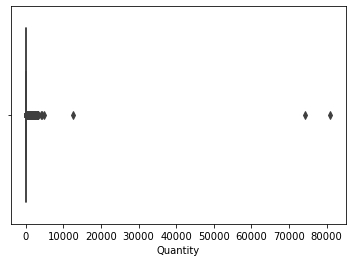

In [47]:
sns.boxplot(x=df1['Quantity'])  # vẽ box plot cho dữ liệu ở cột Quantity

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


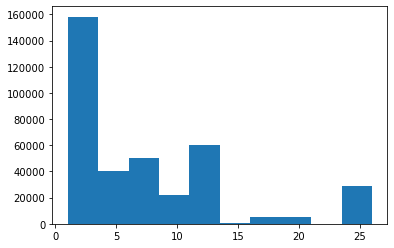

In [51]:
# Xóa dữ liệu ngoại lai bằng IQR score
Q1 = df1['Quantity'].quantile(0.25)
Q3 = df1['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df2 = df1.loc[:,:][(df1['Quantity']>Q1-1.5*IQR)&(df1['Quantity']<Q3+1.5*IQR)]
display(df2)
plt.hist(df2['Quantity'], bins=10)
plt.show()

<AxesSubplot:xlabel='Quantity'>

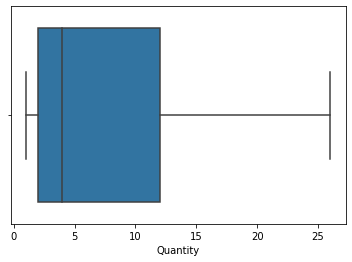

In [52]:
sns.boxplot(x=df2['Quantity'])

#### Chuẩn hóa dữ liệu

<AxesSubplot:xlabel='Quantity'>

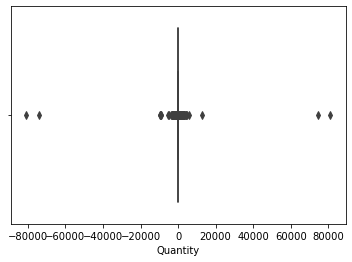

In [158]:
# vẽ biểu đồ hộp cho cột Quantity
sns.boxplot(x=df['Quantity'])

In [159]:
df.shape

(541909, 9)

In [160]:
# mô tả dữ liệu
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

#### Chuẩn hóa dữ liệu với MinMax Scaling

In [161]:
scaler = MinMaxScaler()

In [162]:
# Chuẩn hóa dữ liệu trong df với MinMaxScaler ở cột Quantity
df_s = scaler.fit_transform(df[['Quantity']])

In [163]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,541909.000000
mean,0.500059
std,0.001346
min,0.000000
25%,0.500006
50%,0.500019
75%,0.500062
max,1.000000


<AxesSubplot:>

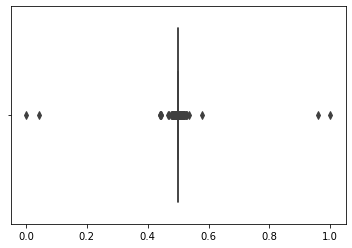

In [164]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

#### chuẩn hóa dữ liệu với robust scaling

In [165]:
scaler = RobustScaler()

In [166]:
# Chuẩn hóa dữ liệu trong df với RobustScaler ở cột Quantity
df_s = scaler.fit_transform(df[['Quantity']]) # df hay df1

In [167]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,541909.000000
mean,0.728028
std,24.231240
min,-8999.777778
25%,-0.222222
50%,0.000000
75%,0.777778
max,8999.111111


<AxesSubplot:>

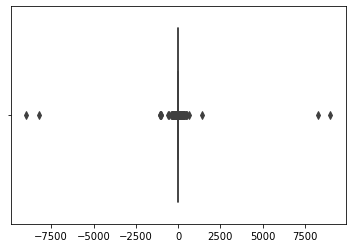

In [168]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

#### chuẩn hóa dữ liệu với z-score scaling

In [177]:
scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler ở cột Quantity 
df_s = scaler.fit_transform(df[['Quantity']])

In [178]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,5.419090e+05
mean,-6.984371e-15
std,1.000001e+00
min,-3.714426e+02
25%,-3.921594e-02
50%,-3.004503e-02
75%,2.053139e-03
max,3.713550e+02


<AxesSubplot:>

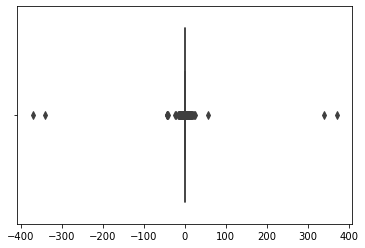

In [179]:
sns.boxplot(x=df_s)

<AxesSubplot:ylabel='Density'>

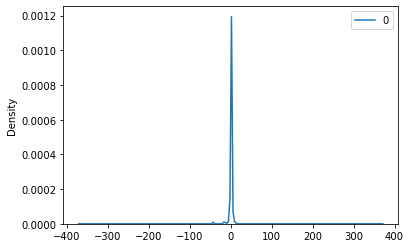

In [180]:
sns.kdeplot(data=df_s)

#### Mã hóa dữ liệu

In [131]:
# các giá trị ở cột Country
df1['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [132]:
# mã hóa cột Country với One-hot encoder sử dụng scikit learn
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(np.asarray(df1['Country']).reshape(-1,1))
encoded_data.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [133]:
# mã hóa cột Country với One-hot encoder sử dụng pandas
pd.get_dummies(df1['Country'])

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# mã hóa cột Country với Label encoder sử dụng scikit learn
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(np.asarray(df1['Country']))
encoded_data

array([35, 35, 35, ..., 13, 13, 13])

In [136]:
# mã hóa cột Country với Label encoder sử dụng pandas
df1['Country'].astype('category').cat.codes

0         35
1         35
2         35
3         35
4         35
          ..
541904    13
541905    13
541906    13
541907    13
541908    13
Length: 397924, dtype: int8

#### Rời rạc hóa dữ liệu

In [137]:
df1.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [138]:
# Rời rạc hóa dữ liệu ở cột UnitPrice
# chia thành 4 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(df1['UnitPrice'], 4)
cats

0         (-8.143, 2035.688]
1         (-8.143, 2035.688]
2         (-8.143, 2035.688]
3         (-8.143, 2035.688]
4         (-8.143, 2035.688]
                 ...        
541904    (-8.143, 2035.688]
541905    (-8.143, 2035.688]
541906    (-8.143, 2035.688]
541907    (-8.143, 2035.688]
541908    (-8.143, 2035.688]
Name: UnitPrice, Length: 397924, dtype: category
Categories (4, interval[float64, right]): [(-8.143, 2035.688] < (2035.688, 4071.375] < (4071.375, 6107.062] < (6107.062, 8142.75]]

In [139]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)


(-8.143, 2035.688]      397915
(2035.688, 4071.375]         6
(4071.375, 6107.062]         2
(6107.062, 8142.75]          1
Name: UnitPrice, dtype: int64

In [181]:
# chia thành 4 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df1['UnitPrice'], 4)
cats

0            (1.95, 3.75]
1            (1.95, 3.75]
2            (1.95, 3.75]
3            (1.95, 3.75]
4            (1.95, 3.75]
               ...       
541904     (-0.001, 1.25]
541905       (1.95, 3.75]
541906    (3.75, 8142.75]
541907    (3.75, 8142.75]
541908    (3.75, 8142.75]
Name: UnitPrice, Length: 397924, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 1.25] < (1.25, 1.95] < (1.95, 3.75] < (3.75, 8142.75]]

In [141]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(-0.001, 1.25]     140759
(1.95, 3.75]       100658
(3.75, 8142.75]     86446
(1.25, 1.95]        70061
Name: UnitPrice, dtype: int64